## DATA TRAINING

In [1]:
import numpy as np
import pandas as pd
import math
import joblib

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("augmented_only.csv")
seed = 33
df

,time_Seconds,round_trip,stop,time,elapsed,lat,lon,next_stop
0,29842.0,NaN,5.0,8:17:22,32.0,18.403751,-66.046593,6.0
1,29889.0,NaN,6.0,8:18:09,47.0,18.403879,-66.048199,13.0
2,29948.0,NaN,13.0,8:19:08,59.0,18.403955,-66.049898,24.0
3,29977.0,NaN,24.0,8:19:37,29.0,18.404698,-66.050468,23.0
4,30018.0,NaN,23.0,8:20:18,41.0,18.406440,-66.050140,20.0
...,...,...,...,...,...,...,...,...
370,34836.0,1187.0,2.1,9:40:36,109.0,18.406243,-66.043161,1.0
371,34991.0,1131.0,1.0,9:43:11,155.0,18.407170,-66.041989,2.2
372,35167.0,1087.0,2.2,9:46:07,176.0,18.406243,-66.043161,3.0
373,35304.0,1062.0,3.0,9:48:24,137.0,18.404856,-66.044836,4.0


### Predicting time until next stop

In [2]:
#modify if necessary
sub = df[['stop','time_Seconds','elapsed']]
sub = df.dropna()



####
### Testing and training with dif files
####

training = pd.read_csv("augmented_only.csv")
testing = pd.read_csv("cleaned.csv")
sub_testing = testing[['stop','time_Seconds','elapsed']]
sub_testing = sub_testing.dropna()

sub_training = training[['stop','time_Seconds','elapsed']]
sub_training = sub_training.dropna()

X_train = sub_training[['stop','time_Seconds']]
y_train= sub_training['elapsed']

X_test = sub_testing[['stop','time_Seconds']]
y_test = sub_testing['elapsed']



Sample times


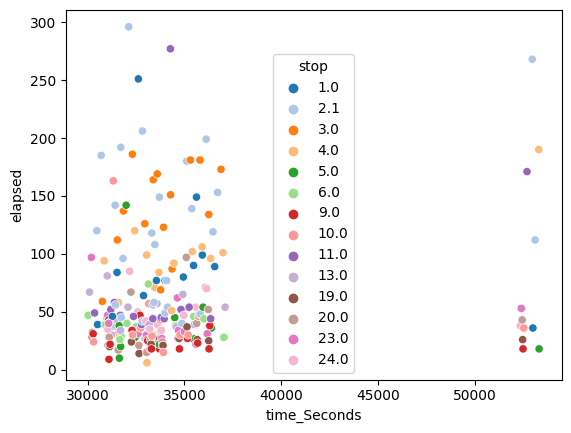

Predicted times


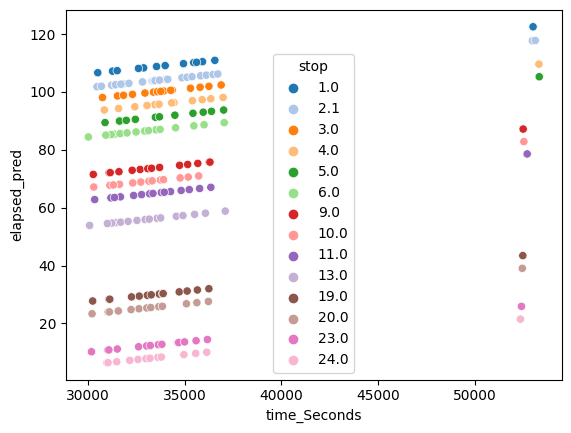

Differences between real and predicted times


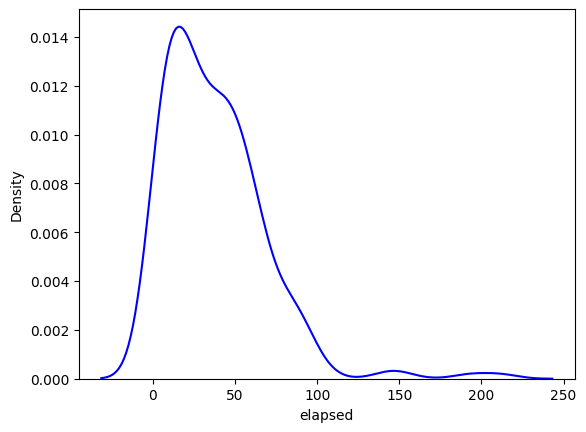

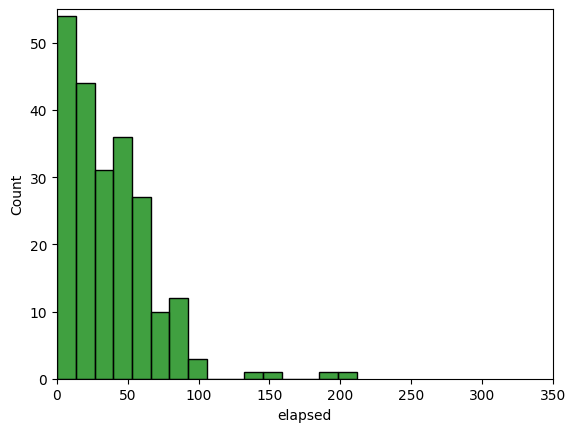

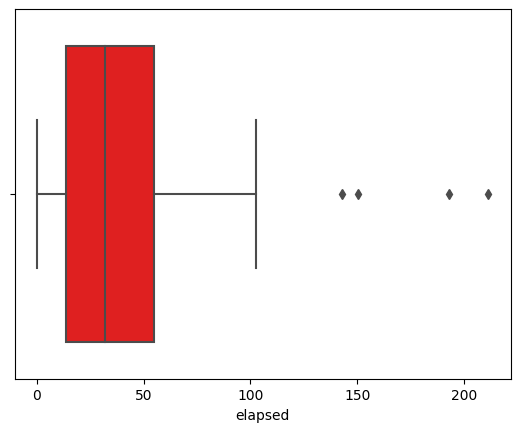

Statistical data
count    221.000000
mean      37.647947
std       31.052375
min        0.230878
25%       13.640652
50%       32.041720
75%       54.684524
max      211.430758
Name: elapsed, dtype: float64


In [3]:

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Graph results
pred = X_test
dat = X_test
pred['elapsed_pred']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed_pred',hue='stop',palette="tab20")
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())

Sample times


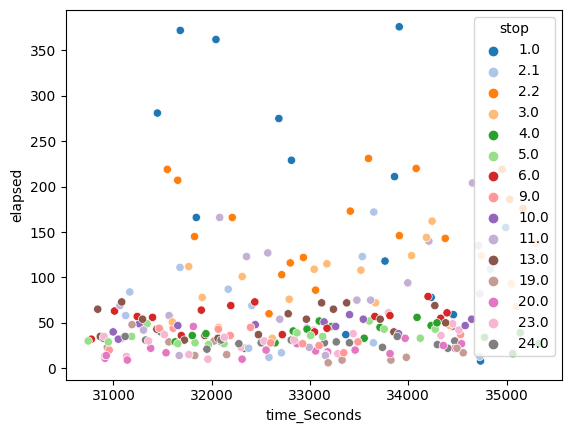

Predicted times


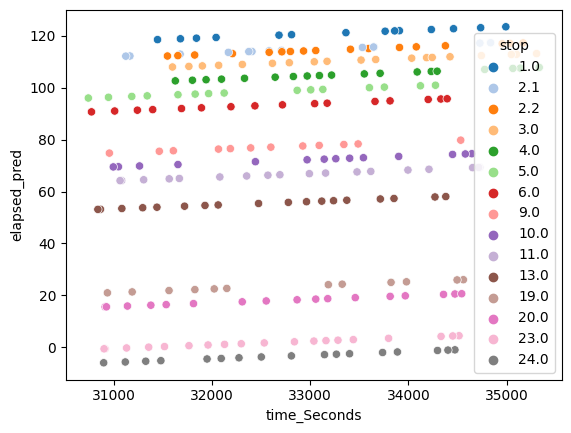

Differences between real and predicted times


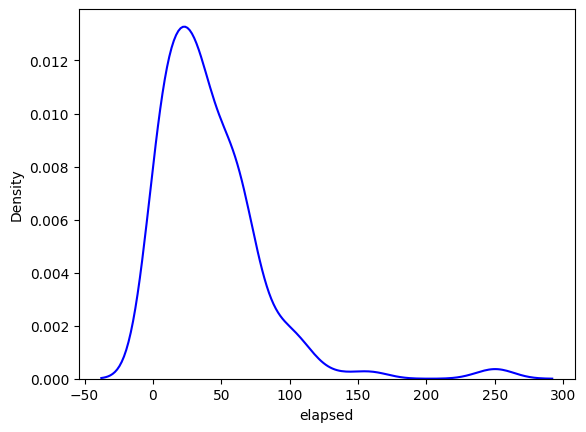

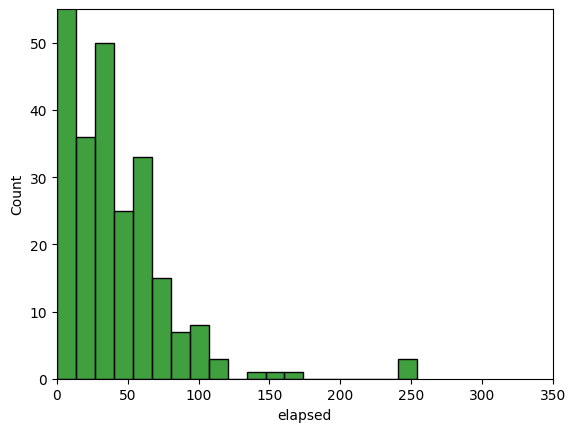

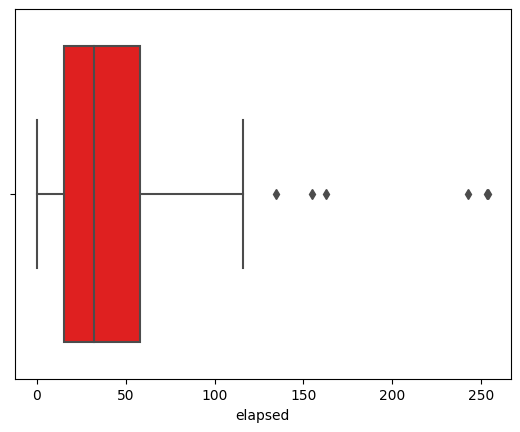

Statistical data
count    240.000000
mean      41.441239
std       37.905309
min        0.240000
25%       15.137285
50%       32.125883
75%       57.991107
max      254.112869
Name: elapsed, dtype: float64


In [4]:

X = sub[['stop','time_Seconds']]
y = sub['elapsed']

#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=seed)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Graph results
pred = X_test
dat = X_test
pred['elapsed_pred']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed_pred',hue='stop',palette="tab20")
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())

In [5]:
#save model
joblib.dump(reg,"model.pkl")

['model.pkl']

In [6]:
pred

,stop,time_Seconds,elapsed_pred,elapsed
258,24.0,32503.0,-3.670920,28.0
348,24.0,33267.0,-2.606182,29.0
344,4.0,33094.0,104.630973,52.0
315,5.0,31185.0,96.596608,35.0
71,1.0,34459.0,122.655025,59.0
...,...,...,...,...
40,2.1,32376.0,113.840776,22.0
15,5.0,30948.0,96.266316,29.0
102,2.2,31654.0,112.297179,207.0
215,20.0,33814.0,19.651788,16.0


In [7]:
pred['stop'].unique()

array([24. ,  4. ,  5. ,  1. ,  2.1,  2.2, 11. , 10. ,  6. , 23. , 20. ,
        3. , 13. , 19. ,  9. ])

In [8]:
pred[pred['elapsed_pred'] < 0]

,stop,time_Seconds,elapsed_pred,elapsed
258,24.0,32503.0,-3.670920,28.0
348,24.0,33267.0,-2.606182,29.0
363,24.0,34473.0,-0.925456,30.0
19,23.0,31132.0,-0.207683,13.0
243,24.0,31481.0,-5.095216,40.0
198,24.0,32809.0,-3.244467,31.0
94,23.0,30913.0,-0.512889,14.0
318,24.0,31327.0,-5.309836,31.0
123,24.0,33146.0,-2.774812,28.0
333,24.0,32276.0,-3.987276,27.0


In [9]:
pred['time_Seconds'] = pred['time_Seconds']/3600

In [16]:
pred[pred['stop']==1]

,stop,time_Seconds,elapsed_pred,elapsed
71,1.0,9.571944,122.655025,59.0
26,1.0,8.800000,118.782109,372.0
131,1.0,9.418889,121.887131,376.0
281,1.0,9.378611,121.685054,118.0
326,1.0,8.845278,119.009272,166.0
341,1.0,9.114167,120.358312,229.0
221,1.0,9.509167,122.340063,78.0
146,1.0,9.648611,123.039668,8.0
101,1.0,8.735278,118.457392,281.0
251,1.0,8.900833,119.287999,362.0


In [17]:
new_df = pred.groupby('stop').mean().reset_index()

In [18]:
new_df

,stop,time_Seconds,elapsed_pred,elapsed
0,1.0,9.242460,121.001973,194.785714
1,2.1,9.115363,114.453011,69.615385
2,2.2,9.245801,114.570036,159.882353
3,3.0,9.291316,110.499260,94.684211
4,4.0,9.279839,105.067768,37.421053
5,5.0,9.010241,98.341255,35.466667
6,6.0,9.062118,93.227616,55.062500
7,9.0,9.043056,77.010239,32.916667
8,10.0,9.152758,72.186713,46.785714
9,11.0,9.134676,66.722082,84.888889
